### Exploratory Analysis of Past Epi data from DRC (looking for regional patterns)

In [3]:
import pandas as pd
from datetime import datetime
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# epi_df = pd.read_excel('../data/past_epi/compil-2006-2017.xlsx')
# columns = ['PROV','ZS','POP','ANNEE','MOIS','NUMSEM','MALADIE','TOTALCAS','TOTALDECES']
# pruned_epi_df = epi_df[columns]
# pruned_epi_df['PROV'] = pruned_epi_df.PROV.str.title()
# pruned_epi_df['ZS'] = pruned_epi_df.ZS.str.title()
# pruned_epi_df.columns = ['Province','Health Zone','Population','Year','Month', 'EW', 'Disease','Total Cases','Total Deaths']
# pruned_epi_df.to_csv('../data/past_epi/DRC_EpiData_2006-2017.csv',index=None)

In [5]:
## Hasty 'fix' for EW overflow at end of year. Need to do it correctly. 
# epi_df = pd.read_csv('../data/past_epi/DRC_EpiData_2006-2017.csv')
# epi_df['EW'] = epi_df.apply(lambda x: 52 if ((x['Month']==12)&(x['EW']==1)) else x['EW'], axis = 1)
# epi_df = epi_df[epi_df.EW!=0] ## One entry with EW 0.
# epi_df['Date'] = epi_df.apply(lambda x: datetime.strptime(str(x['Year'])+'-'+str(x['EW'])+'-0','%Y-%W-%w'),axis=1)
# epi_df = epi_df.sort_values('Date')
# epi_df.to_csv('../data/past_epi/DRC_EpiData_2006-2017-datecleaned.csv',index=None)

In [6]:
epi_df = pd.read_csv('../data/past_epi/DRC_EpiData_2006-2017-datecleaned.csv')
epi_df['Date'] = pd.to_datetime(epi_df.Date)

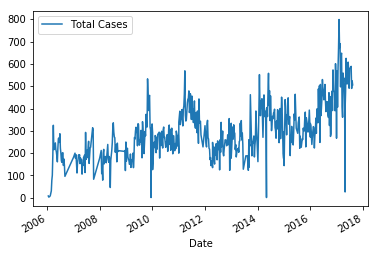

In [7]:
epi_df[(epi_df['Health Zone']=='Wangata')&(epi_df['Disease']=='PALUDISME')].plot(x='Date',y='Total Cases')

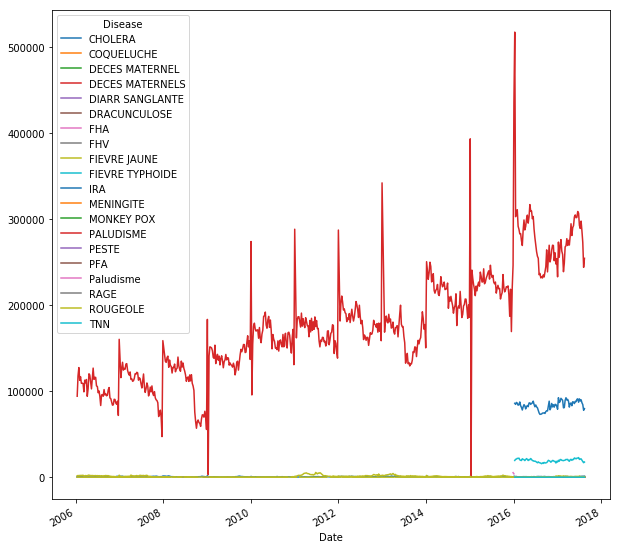

In [8]:
nat_epi = epi_df.groupby(['Date','Disease'])['Total Cases','Total Deaths'].sum().reset_index()
f = plt.figure(figsize=(10,10))
ax = plt.gca()
nat_epi.pivot(index='Date',columns='Disease',values='Total Cases').plot(ax=ax)

In [9]:
epi_df.groupby('Disease')['Total Cases'].sum()

Disease
CHOLERA               294412.0
COQUELUCHE              3968.0
DECES MATERNEL           939.0
DECES MATERNELS         1093.0
DIARR SANGLANTE        43097.0
DRACUNCULOSE              23.0
FHA                       44.0
FHV                      402.0
FIEVRE JAUNE            7218.0
FIEVRE TYPHOIDE      1632406.0
IRA                  7035789.0
MENINGITE              14943.0
MONKEY POX              5284.0
PALUDISME          104644663.0
PESTE                    130.0
PFA                     2256.0
Paludisme               9154.0
RAGE                     225.0
ROUGEOLE              592850.0
TNN                     1660.0
Name: Total Cases, dtype: float64